In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
growth_stock_health = ['CSPI', 'CXM', 'DUOL', 'ENFN', 'INTC', 'LDOS', 'MLAB', 'PAY', 'SMCI', 'SPLK']
start_date = '2022-12-30'
healthcare_growth_data = yf.download(growth_stock_health, start=start_date)['Adj Close']
healthcare_growth_daily_return = healthcare_growth_data.pct_change().loc['2022-12-30': '2023-12-29',:]
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

healthcare_growth_daily_return = healthcare_growth_daily_return.iloc[1:healthcare_growth_daily_return.shape[0],:]
healthcare_growth_daily_return.index.name = None
healthcare_growth_daily_return

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,CSPI,CXM,DUOL,ENFN,INTC,LDOS,MLAB,PAY,SMCI,SPLK
2023-01-03,0.002121,-0.012240,-0.002812,0.134436,0.011351,-0.004563,0.036099,0.021223,0.021437,0.008480
2023-01-04,-0.002116,0.004957,0.021853,-0.000912,0.035541,-0.003247,0.035770,-0.013448,-0.019199,0.032596
2023-01-05,0.023330,-0.032059,-0.012003,0.009124,-0.004335,-0.003449,-0.035544,-0.013631,-0.024316,-0.053207
2023-01-06,0.017617,-0.011465,0.006563,-0.031646,0.042453,0.009037,0.023600,0.002513,0.051589,-0.017908
2023-01-09,0.042770,0.025773,0.017203,0.010271,0.020188,-0.044021,0.015333,-0.023810,0.004503,0.043666
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.002468,-0.008354,-0.001383,0.001034,0.019541,0.009757,0.007189,0.002214,-0.047538,0.001976
2023-12-26,-0.007878,0.005897,-0.019224,0.018595,0.052083,0.002509,-0.000761,0.003865,0.015912,0.000986
2023-12-27,-0.019355,0.008375,0.011298,-0.008114,0.005148,-0.000741,-0.011333,0.017052,0.002276,-0.001117
2023-12-28,0.000506,0.014950,-0.013626,0.005112,-0.007289,0.001113,0.021096,-0.015684,-0.012034,-0.000132


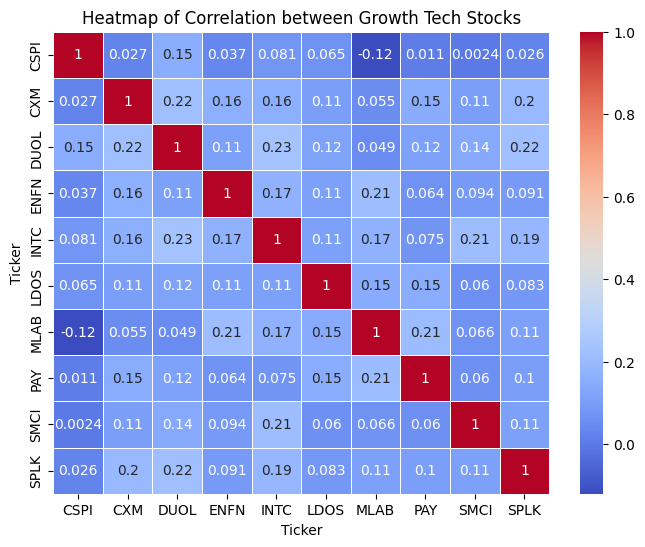

In [3]:
growth_healthcare_corr = healthcare_growth_daily_return.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(growth_healthcare_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation between Growth Tech Stocks')
plt.show()

Text(0, 0.5, 'Total Returns')

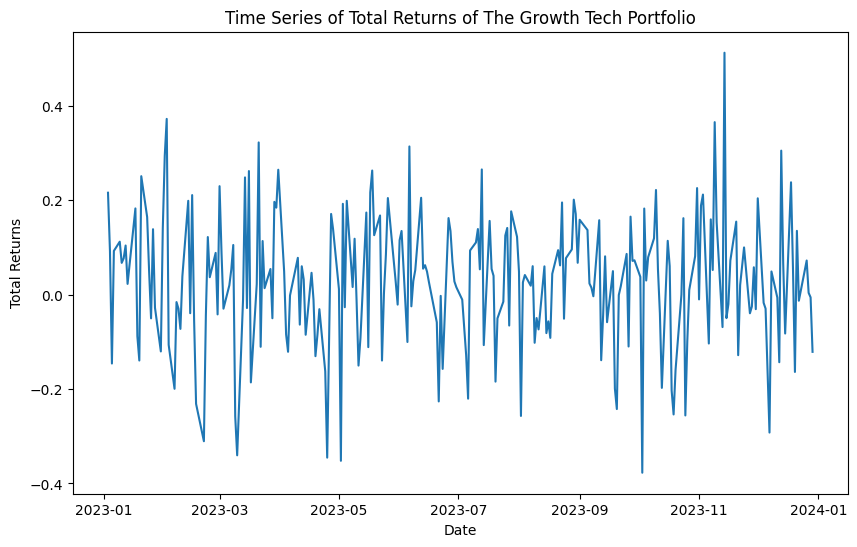

In [4]:
healthcare_growth_daily_return['Total Return'] = healthcare_growth_daily_return.sum(axis=1)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each time series
plt.plot(healthcare_growth_daily_return['Total Return'])
plt.title('Time Series of Total Returns of The Growth Tech Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Returns')

<Figure size 1000x600 with 0 Axes>

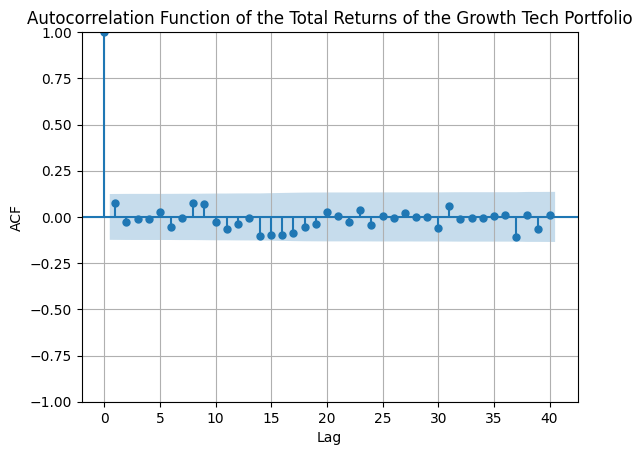

In [5]:
plt.figure(figsize=(10, 6))
plot_acf(healthcare_growth_daily_return.iloc[:,-1], lags=40) 
plt.title('Autocorrelation Function of the Total Returns of the Growth Tech Portfolio')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

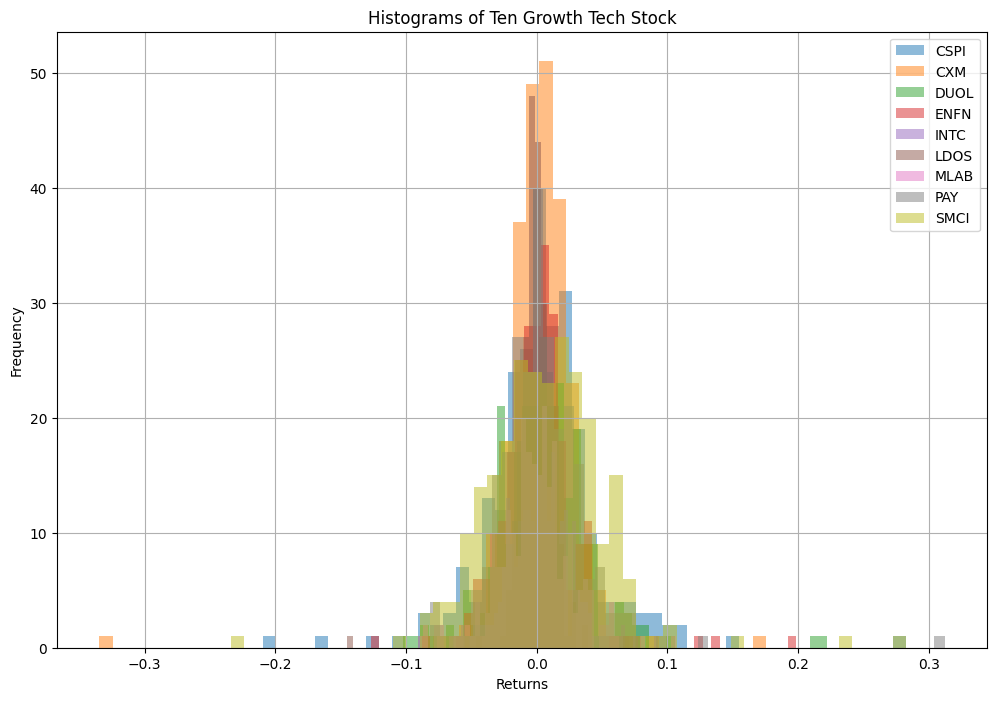

In [6]:
healthcare_growth_daily_return = healthcare_growth_daily_return.iloc[:,0:9]
plt.figure(figsize=(12, 8))
for col in healthcare_growth_daily_return.columns:
    plt.hist(healthcare_growth_daily_return[col], bins=50, alpha=0.5, label=col)

plt.title('Histograms of Ten Growth Tech Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
value_stock_health = ['APP', 'DLO', 'FTNT', 'IMXI', 'ITRN', 'KARO', 'LYTS', 'NVEC', 'PSN', 'SATS']
start_date = '2022-12-30'
healthcare_value_data = yf.download(value_stock_health, start=start_date)['Adj Close']
healthcare_value_daily_return = healthcare_value_data.pct_change().loc['2022-12-30': '2023-12-29',:]
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

healthcare_value_daily_return = healthcare_value_daily_return.iloc[1:healthcare_growth_daily_return.shape[0],:]
healthcare_value_daily_return.index.name = None
healthcare_value_daily_return

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,APP,DLO,FTNT,IMXI,ITRN,KARO,LYTS,NVEC,PSN,SATS
2023-01-03,0.018993,-0.012845,-0.007568,-0.019286,0.003313,0.004292,0.004085,0.012664,-0.022270,0.005396
2023-01-04,0.015843,0.031880,-0.004534,-0.054393,-0.009434,0.031624,-0.009764,0.022876,-0.005971,-0.023852
2023-01-05,-0.096330,-0.053279,-0.017598,0.011947,0.000476,-0.005799,0.001643,0.013866,-0.024917,-0.001222
2023-01-06,-0.013198,0.046953,0.026133,-0.002624,0.019039,-0.007083,0.028712,0.021618,0.006388,0.015902
2023-01-09,0.047325,0.010178,0.014787,0.001754,-0.013078,-0.013848,0.019936,0.017417,-0.015643,-0.034919
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,-0.002320,0.031746,0.018451,0.016803,0.014275,0.001198,0.008621,0.017696,0.010931,0.028530
2023-12-22,-0.041628,0.011966,0.012989,-0.015185,0.005185,-0.005385,-0.003561,0.004128,0.004611,0.013513
2023-12-26,-0.019655,0.013514,0.008942,0.000000,0.004790,0.000201,0.007148,-0.003613,-0.004590,0.035789
2023-12-27,0.006188,-0.002222,-0.007692,0.004082,0.006601,-0.009623,0.004258,0.004001,0.000954,0.021680


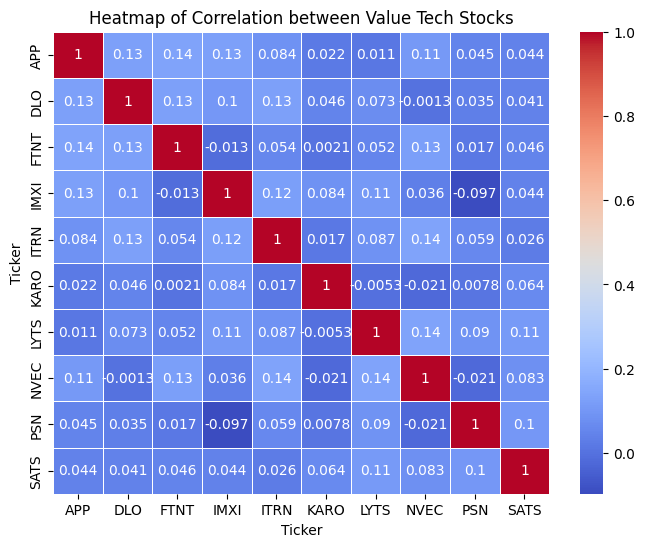

In [8]:
value_healthcare_corr = healthcare_value_daily_return.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(value_healthcare_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation between Value Tech Stocks')
plt.show()

Text(0, 0.5, 'Total Returns')

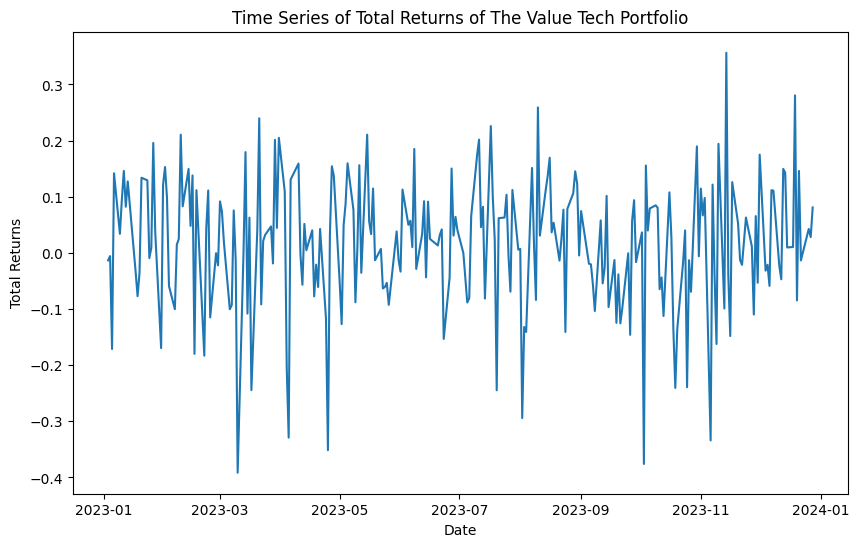

In [9]:
healthcare_value_daily_return['Total Return'] = healthcare_value_daily_return.sum(axis=1)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each time series
plt.plot(healthcare_value_daily_return['Total Return'])
plt.title('Time Series of Total Returns of The Value Tech Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Returns')

<Figure size 1000x600 with 0 Axes>

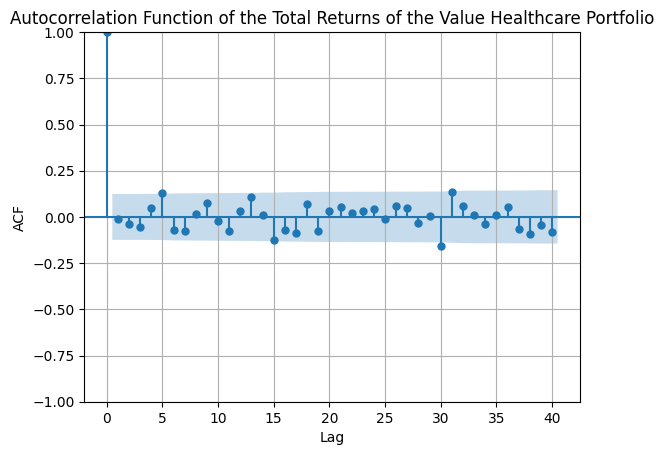

In [10]:
plt.figure(figsize=(10, 6))
plot_acf(healthcare_value_daily_return.iloc[:,-1], lags=40) 
plt.title('Autocorrelation Function of the Total Returns of the Value Healthcare Portfolio')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

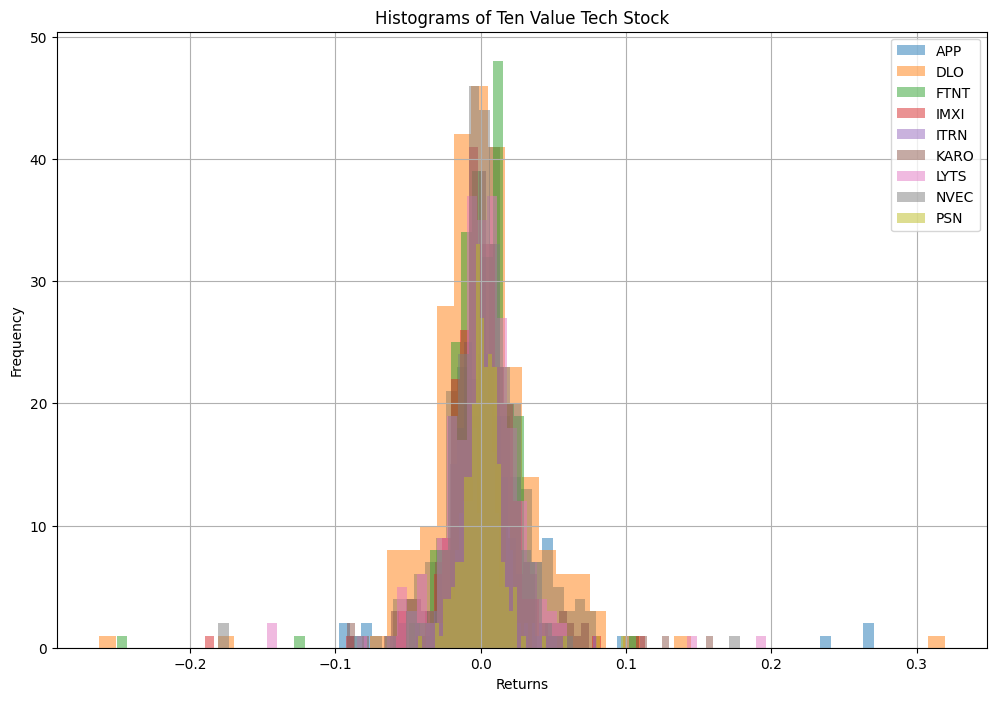

In [11]:
healthcare_value_daily_return = healthcare_value_daily_return.iloc[:,0:9]
plt.figure(figsize=(12, 8))
for col in healthcare_value_daily_return.columns:
    plt.hist(healthcare_value_daily_return[col], bins=50, alpha=0.5, label=col)

plt.title('Histograms of Ten Value Tech Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()